Error Upper Bound = 4.472472597636507e-05
Fit results: 0.9999391113841958 4.6140611994499323e-05


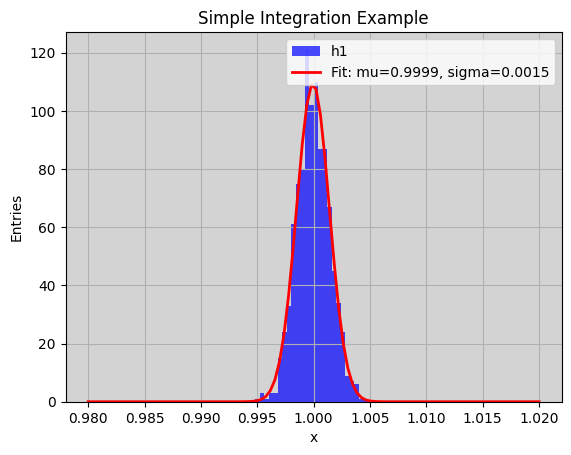

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def generator_function(x):
    return 3.0 / 2.0 * (1.0 - x * x)

np.random.seed(1)

niter = 1000
nbins = 100
deltax = 0.04

npoints = 100000
xlow = 0.0
xhigh = 1.0
dx = (xhigh - xlow) / npoints

error = 0.0
sum_iter = []
for j in range(niter):
    sum_iteration = 0.0
    sigma_iteration = 0.0

    for i in range(npoints):
        xval = xlow + np.random.random() * (xhigh - xlow)
        yval = generator_function(xval)
        sum_iteration = sum_iteration + dx * yval
        sigma_iteration = sigma_iteration + dx * yval * yval

    error = error + np.power(np.sqrt(sigma_iteration - sum_iteration * sum_iteration) / np.sqrt(npoints), 2)
    sum_iter.append(sum_iteration)

print("Error Upper Bound =", np.sqrt(error) / niter)

# Create histogram
fig, ax = plt.subplots()
h1, bins, _ = ax.hist(sum_iter, bins=nbins, range=(1-deltax/2, 1+deltax/2), color='blue', alpha=0.7, label='h1')

ax.grid(True)
ax.patch.set_facecolor('lightgrey')

# Fit Gaussian to the histogram
(mu, sigma) = norm.fit(sum_iter)
print(f"Fit results: {mu} {sigma/np.sqrt(niter)}")
x = np.linspace(1-deltax/2, 1+deltax/2, nbins)
y = norm.pdf(x, mu, sigma)
ax.plot(x, y*deltax*niter/nbins, 'r-', linewidth=2, label='Fit: mu=%.4f, sigma=%.4f' % (mu, sigma))

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('Entries')
ax.set_title('Simple Integration Example')

# Add legend
ax.legend()

# Show the plot
plt.show()
